In [2]:
import matplotlib
import numpy
import pandas
import seaborn

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
ratings = pandas.read_csv('ratings.csv')
tags = pandas.read_csv('tags.csv')
movies = pandas.read_csv('movies.csv')
links = pandas.read_csv('links.csv')

%matplotlib inline

### DATA PREPROCESSING

In [4]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [5]:
links.isna().sum().sort_values(ascending = False)

tmdbId     8
movieId    0
imdbId     0
dtype: int64

In [6]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [7]:
tags.isna().sum().sort_values(ascending = False)

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [8]:
tags['userId'].nunique()

58

In [9]:
tags['movieId'].nunique()

1572

In [10]:
1572/9742

0.16136316978033258

In [11]:
ratings


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [12]:
ratings.isna().sum().sort_values(ascending = False)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [13]:
ratings['movieId'].nunique()

9724

In [14]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [15]:
ratings['rating'].value_counts().sort_values()

0.5     1370
1.5     1791
1.0     2811
2.5     5550
2.0     7551
4.5     8551
3.5    13136
5.0    13211
3.0    20047
4.0    26818
Name: rating, dtype: int64

In [16]:
ratings[ratings['rating']>=3]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [17]:
81763/100836


0.8108512832718473

In [18]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [19]:
movies.isna().sum().sort_values(ascending = False)

movieId    0
title      0
genres     0
dtype: int64

In [20]:
movies['genres'].nunique()

951

In [21]:
GenUn = set()
for x in movies["genres"] :
    a = x.split('|')
    for i in a : GenUn.add(i)


In [22]:
GenUn

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [23]:
len(GenUn)

20

In [24]:
movies[movies["genres"]=="(no genres listed)"]

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [25]:
NoGenId=movies[movies["genres"]=="(no genres listed)"]['movieId']

In [26]:
for x in NoGenId:
    print(ratings[ratings['movieId']==x])

      userId  movieId  rating   timestamp
7353      50   114335     3.0  1522446443
       userId  movieId  rating   timestamp
88075     567   122888     0.5  1525289924
       userId  movieId  rating   timestamp
3624       21   122896     4.0  1452052163
9101       62   122896     3.5  1523047955
17780     111   122896     3.5  1516152736
30471     212   122896     3.5  1528479617
36355     248   122896     4.0  1534592058
37495     252   122896     3.0  1498284070
90221     586   122896     5.0  1529899587
       userId  movieId  rating   timestamp
70344     448   129250     0.5  1447868930
       userId  movieId  rating   timestamp
95014     599   132084     2.5  1519142705
       userId  movieId  rating   timestamp
17804     111   134861     2.5  1516154900
       userId  movieId  rating   timestamp
92128     596   141131     2.5  1535712067
       userId  movieId  rating   timestamp
86573     560   141866     4.0  1469653431
88111     567   141866     3.0  1525286842
95034     599

In [27]:
movies['title'].nunique()

9737

In [28]:

movies['title'].duplicated().value_counts()

False    9737
True        5
Name: title, dtype: int64

In [29]:
movies[movies['title'].duplicated()]

,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [30]:
movies[movies['title']=='Emma (1996)']

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
5601,26958,Emma (1996),Romance


In [31]:
movies['title'].duplicated().sum() 

5

In [32]:
movies=movies.drop_duplicates(subset=['title'])

In [33]:
movies['title'].duplicated().sum() 

0

In [34]:
movies['movieId'].count()

9737

In [35]:
#genre replace 

In [36]:
movies.loc[(movies['genres']=='(no genres listed)') & (movies['title']=='Ben-hur (2016)'),'genres']='War'

In [37]:
movies.loc[movies['title']=='Ben-hur (2016)']

,movieId,title,genres
8684,122888,Ben-hur (2016),War


In [38]:
movies.count()

movieId    9737
title      9737
genres     9737
dtype: int64

In [39]:
def count_word(df, ref_col, lista):
    keyword_count = dict()
    for s in lista: keyword_count[s] = 0
    for lista_keywords in df[ref_col].str.split('|'):
        if type(lista_keywords) == float and pandas.isnull(lista_keywords): continue
        for s in lista_keywords: 
            if pandas.notnull(s): keyword_count[s] += 1
    
    
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [40]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [41]:
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences

[['Drama', 4359],
 ['Comedy', 3755],
 ['Thriller', 1892],
 ['Action', 1827],
 ['Romance', 1593],
 ['Adventure', 1263],
 ['Crime', 1198],
 ['Horror', 978],
 ['Sci-Fi', 978],
 ['Fantasy', 779],
 ['Children', 664],
 ['Animation', 611],
 ['Mystery', 573],
 ['Documentary', 440],
 ['War', 383],
 ['Musical', 334],
 ['Western', 167],
 ['IMAX', 158],
 ['Film-Noir', 87],
 ['(no genres listed)', 33]]

In [42]:
keyword_occurences = dict(keyword_occurences)
keyword_occurences

{'Drama': 4359,
 'Comedy': 3755,
 'Thriller': 1892,
 'Action': 1827,
 'Romance': 1593,
 'Adventure': 1263,
 'Crime': 1198,
 'Horror': 978,
 'Sci-Fi': 978,
 'Fantasy': 779,
 'Children': 664,
 'Animation': 611,
 'Mystery': 573,
 'Documentary': 440,
 'War': 383,
 'Musical': 334,
 'Western': 167,
 'IMAX': 158,
 'Film-Noir': 87,
 '(no genres listed)': 33}

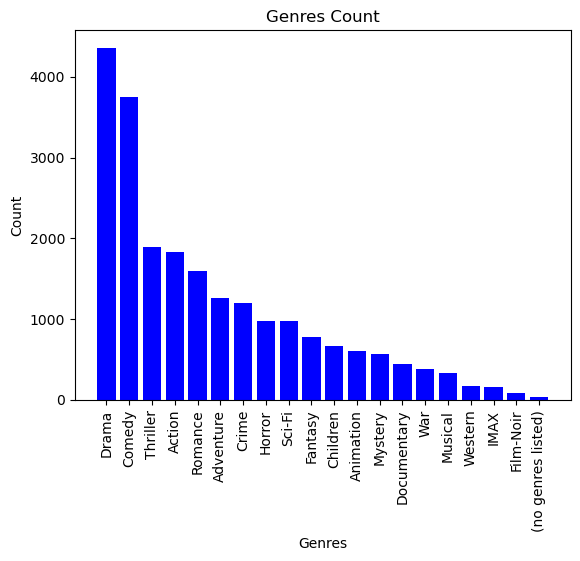

In [43]:
keys = keyword_occurences.keys()
values = keyword_occurences.values()

matplotlib.pyplot.bar(keys, values, color='b')
matplotlib.pyplot.xlabel("Genres")
matplotlib.pyplot.ylabel("Count")
matplotlib.pyplot.title("Genres Count")
matplotlib.pyplot.xticks(rotation='vertical')
matplotlib.pyplot.show()

In [44]:
movies.drop(movies[movies['genres']=='(no genres listed)'].index, inplace=True)

C:\Users\konst\AppData\Local\Temp\ipykernel_4744\3480779515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.drop(movies[movies['genres']=='(no genres listed)'].index, inplace=True)


In [45]:
movies.count() #checking....

movieId    9704
title      9704
genres     9704
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x155b3da6a30>,
 'caps': [<matplotlib.lines.Line2D at 0x155b3da6f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x155b3da6790>],
 'medians': [<matplotlib.lines.Line2D at 0x155b3dbc4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x155b3dbc790>],
 'means': []}

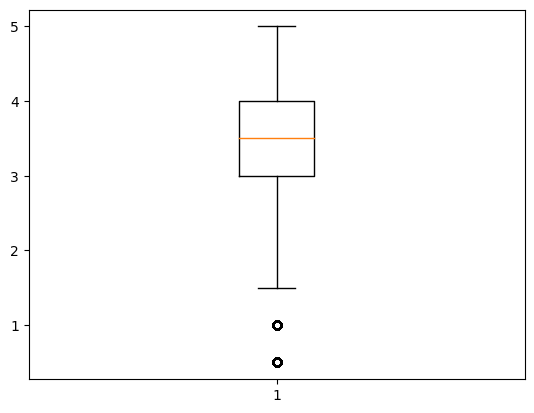

In [46]:
matplotlib.pyplot.boxplot(ratings['rating'])

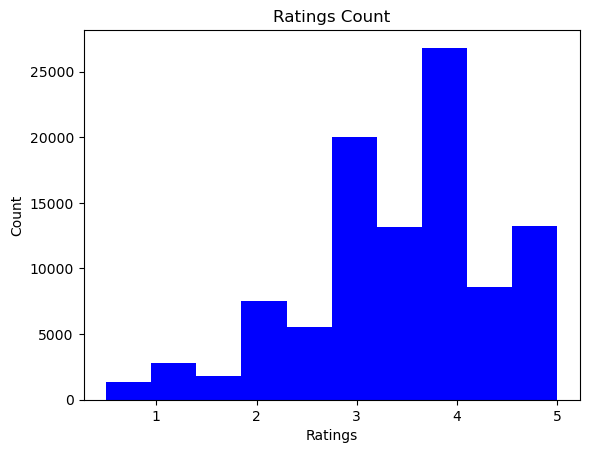

In [47]:
#matplotlib.pyplot.bar(keys, values, color='r')
matplotlib.pyplot.xlabel("Ratings")
matplotlib.pyplot.ylabel("Count")
matplotlib.pyplot.title("Ratings Count")
matplotlib.pyplot.hist(ratings['rating'],color = 'b')
matplotlib.pyplot.show()

#most of the movies are between 3 to 5 stars

In [48]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [49]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [50]:
rateAVG=ratings.groupby('movieId')['rating'].mean()

In [51]:
rateAVG

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

In [52]:
mydata = pandas.merge(movies,rateAVG,on='movieId',how='inner')

In [53]:
mydata

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9681,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9682,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9683,193585,Flint (2017),Drama,3.500000
9684,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [54]:
mydata.isna().sum()

movieId    0
title      0
genres     0
rating     0
dtype: int64

The average rating by itself means nothing. One movie may have only one 5-star rating, but that does not necessarily mean it is better than a movie with 300 ratings and an average rating of 4.3, for example. Therefore, it is important to take into account the number of ratings when comparing movies

In [55]:
mydata['AVGrate']=mydata['rating']

In [56]:
rateCNT=ratings.groupby('movieId')['rating'].count()

In [57]:
rateCNT

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [58]:
mydata = pandas.merge(mydata,rateCNT,on='movieId',how='inner')

In [59]:
mydata

,movieId,title,genres,rating_x,AVGrate,rating_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.071429,49
...,...,...,...,...,...,...
9681,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,4.000000,1
9682,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,3.500000,1
9683,193585,Flint (2017),Drama,3.500000,3.500000,1
9684,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,3.500000,1


In [60]:
mydata.rename(columns = {'rating_y':'CNTrate'}, inplace = True)
mydata=mydata.drop(['rating_x'], axis=1)

In [61]:
mydata

,movieId,title,genres,AVGrate,CNTrate
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9681,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1
9682,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1
9683,193585,Flint (2017),Drama,3.500000,1
9684,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1


In [62]:
mydata.sort_values(by=['CNTrate','AVGrate'],ascending=False)

#mydata.sort_values(by=['AVGrate','CNTrate'],ascending=True).tail()  #for example...

,movieId,title,genres,AVGrate,CNTrate
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.161290,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.192446,278
...,...,...,...,...,...
9379,165645,Bad Santa 2 (2016),Comedy,0.500000,1
9403,167296,Iron Man (1931),Drama,0.500000,1
9508,173307,The Gracefield Incident (2015),Action|Horror|Sci-Fi,0.500000,1
9538,175475,The Emoji Movie (2017),Animation|Children|Comedy,0.500000,1


In [63]:
#simplify the movies with more than one genre

In [64]:
def go(x):
    y=x.split('|')
    return y[0] 
mydata['genres'] = mydata['genres'].apply(lambda x : go(x))

In [65]:
mydata

,movieId,title,genres,AVGrate,CNTrate
0,1,Toy Story (1995),Adventure,3.920930,215
1,2,Jumanji (1995),Adventure,3.431818,110
2,3,Grumpier Old Men (1995),Comedy,3.259615,52
3,4,Waiting to Exhale (1995),Comedy,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9681,193581,Black Butler: Book of the Atlantic (2017),Action,4.000000,1
9682,193583,No Game No Life: Zero (2017),Animation,3.500000,1
9683,193585,Flint (2017),Drama,3.500000,1
9684,193587,Bungo Stray Dogs: Dead Apple (2018),Action,3.500000,1


In [66]:
mydata[mydata['CNTrate']>5]

,movieId,title,genres,AVGrate,CNTrate
0,1,Toy Story (1995),Adventure,3.920930,215
1,2,Jumanji (1995),Adventure,3.431818,110
2,3,Grumpier Old Men (1995),Comedy,3.259615,52
3,4,Waiting to Exhale (1995),Comedy,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9568,177765,Coco (2017),Adventure,3.538462,13
9583,179401,Jumanji: Welcome to the Jungle (2017),Action,3.666667,6
9592,179819,Star Wars: The Last Jedi (2017),Action,3.125000,12
9594,180031,The Shape of Water (2017),Adventure,3.687500,8


In [67]:
mydata.describe()

,movieId,AVGrate,CNTrate
count,9686.000000,9686.000000,9686.000000
mean,41815.535722,3.261711,10.405121
std,51804.989046,0.868687,22.437703
min,1.000000,0.500000,1.000000
25%,3223.250000,2.800000,1.000000
50%,7254.500000,3.416667,3.000000
75%,74904.000000,3.905245,9.000000
max,193609.000000,5.000000,329.000000


Text(0, 0.5, 'Number of Ratings')

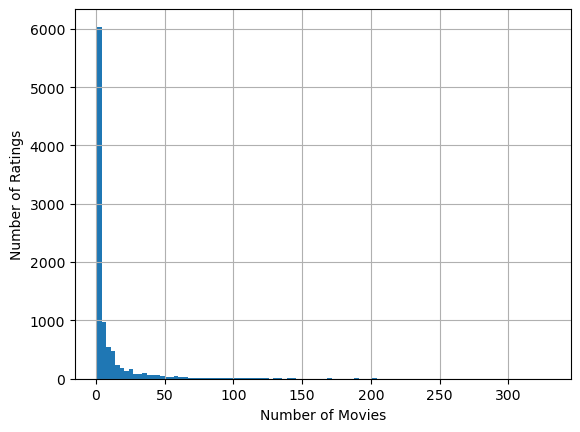

In [68]:
mydata['CNTrate'].hist(bins=100)
matplotlib.pyplot.xlabel('Number of Movies')
matplotlib.pyplot.ylabel('Number of Ratings')

In [69]:
rateLIMIT = 5 
mydata.drop(mydata[mydata['CNTrate']<rateLIMIT].index, inplace=True)

In [70]:
mydata

,movieId,title,genres,AVGrate,CNTrate
0,1,Toy Story (1995),Adventure,3.920930,215
1,2,Jumanji (1995),Adventure,3.431818,110
2,3,Grumpier Old Men (1995),Comedy,3.259615,52
3,4,Waiting to Exhale (1995),Comedy,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9594,180031,The Shape of Water (2017),Adventure,3.687500,8
9603,180985,The Greatest Showman (2017),Drama,3.000000,5
9627,183897,Isle of Dogs (2018),Animation,3.500000,5
9653,187593,Deadpool 2 (2018),Action,3.875000,12


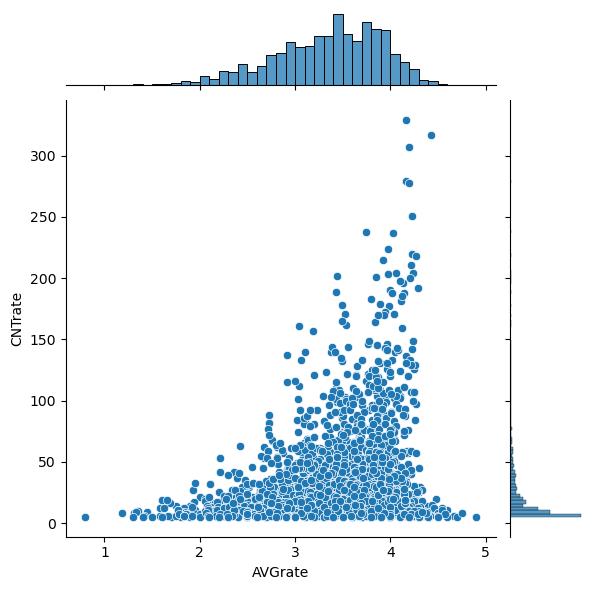

In [71]:
#seaborn.jointplot(x='CNTrate',y='AVGrate',data=mydata)
seaborn.jointplot(x='AVGrate',y='CNTrate',data=mydata)

### CLUSTERING

#### 1

In [72]:
mydataFinal = pandas.get_dummies(mydata,columns=['genres'], drop_first=True)

In [73]:
mydataFinal.drop(['title','movieId'],axis=1,inplace=True)
mydataFinal

,AVGrate,CNTrate,genres_Adventure,genres_Animation,genres_Children,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Fantasy,genres_Film-Noir,genres_Horror,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,3.920930,215,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.431818,110,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.259615,52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.357143,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3.071429,49,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9594,3.687500,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9603,3.000000,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9627,3.500000,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9653,3.875000,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


K-MEANS-1

In [75]:
#K-MEANS 
machine = KMeans(n_clusters=5)

In [76]:
machine.fit(mydataFinal)

KMeans(n_clusters=5)

In [77]:
print(machine.cluster_centers_)

[[ 3.44149636e+00  2.96954248e+01  9.28104575e-02  2.48366013e-02
   2.22222222e-02  2.81045752e-01  4.96732026e-02  3.92156863e-03
   1.73856209e-01  2.61437908e-03  3.92156863e-03  1.96078431e-02
   4.33680869e-19  3.92156863e-03  2.61437908e-03  6.53594771e-03
   6.53594771e-03  3.79470760e-19  3.92156863e-03]
 [ 3.96169662e+00  2.05404762e+02  2.14285714e-01  0.00000000e+00
   0.00000000e+00  9.52380952e-02  9.52380952e-02  0.00000000e+00
   7.14285714e-02  8.67361738e-19  0.00000000e+00  1.38777878e-17
   4.33680869e-19  7.14285714e-02 -4.33680869e-19  0.00000000e+00
   2.38095238e-02 -1.08420217e-19 -8.67361738e-19]
 [ 3.55214143e+00  5.95000000e+01  9.24855491e-02  4.33526012e-02
   1.44508671e-02  2.54335260e-01  6.35838150e-02  2.89017341e-03
   1.53179191e-01  5.78034682e-03  2.16840434e-19  1.44508671e-02
   2.89017341e-03  5.78034682e-03  1.08420217e-18  2.89017341e-03
   2.60208521e-18 -1.08420217e-19 -8.67361738e-19]
 [ 3.25437358e+00  9.51062925e+00  7.56802721e-02  2.38

[Text(0.5, 1.0, 'K - MEANS')]

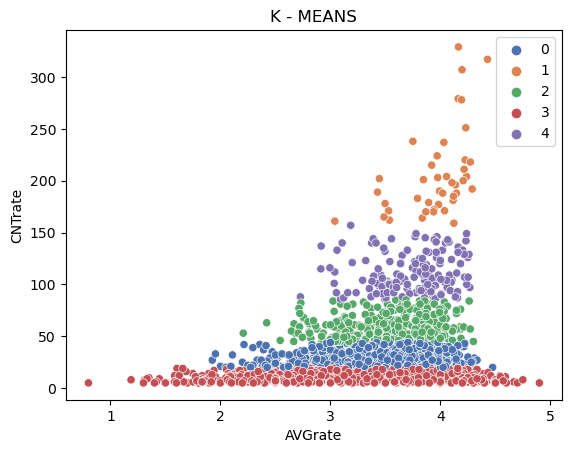

In [78]:
seaborn.scatterplot(data=mydataFinal, x="AVGrate",y="CNTrate",hue=machine.labels_, legend="full", palette="deep").set(title="K - MEANS")

DBSCAN-1

In [79]:
machineDB = DBSCAN(eps=1.5, min_samples=10).fit(mydataFinal)

[Text(0.5, 1.0, 'DBSCAN')]

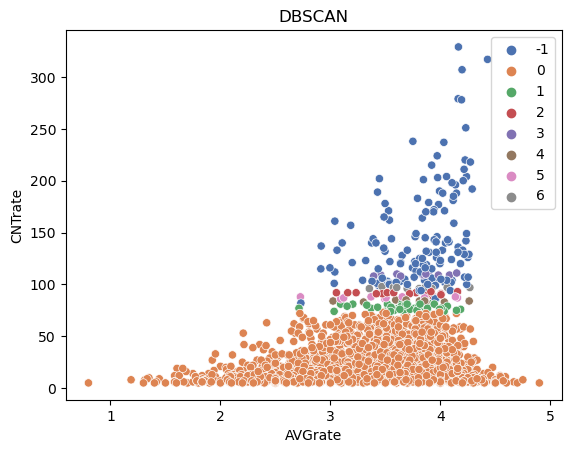

In [80]:
seaborn.scatterplot(data=mydataFinal, x="AVGrate",y="CNTrate", hue=machineDB.labels_, legend="full", palette="deep").set(title="DBSCAN")


In [81]:
#Second case with AVGrate and CNTrate
mydataFinal2 = mydata.drop(['title','movieId','genres'],axis=1)
mydataFinal2

,AVGrate,CNTrate
0,3.920930,215
1,3.431818,110
2,3.259615,52
3,2.357143,7
4,3.071429,49
...,...,...
9594,3.687500,8
9603,3.000000,5
9627,3.500000,5
9653,3.875000,12


K-MEANS-2

In [82]:
machine = KMeans(n_clusters=5)

In [83]:
machine.fit(mydataFinal2)

KMeans(n_clusters=5)

In [84]:
print(machine.cluster_centers_)

[[  3.25871444   9.78003314]
 [  3.75251294 113.59090909]
 [  3.44498341  31.36827957]
 [  3.95777114 206.53658537]
 [  3.56490569  62.44654088]]


<AxesSubplot: xlabel='AVGrate', ylabel='CNTrate'>

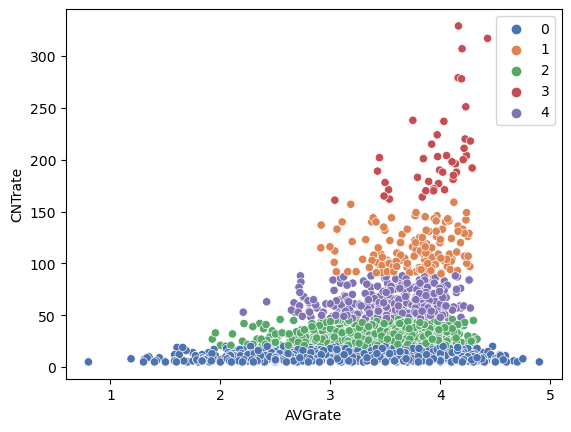

In [85]:
seaborn.scatterplot(data=mydataFinal2, x="AVGrate",y="CNTrate", hue=machine.labels_, legend="full", palette="deep")

DBSCAN-2

In [86]:
machineDB = DBSCAN(eps=1.5, min_samples=10).fit(mydataFinal2)

[Text(0.5, 1.0, 'DBSCAN')]

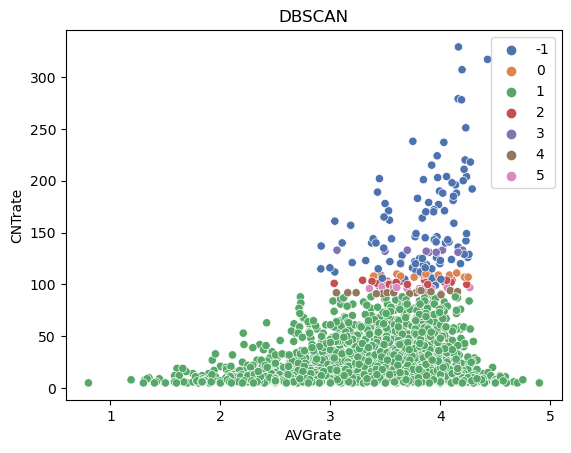

In [87]:
seaborn.scatterplot(data=mydataFinal2, x="AVGrate",y="CNTrate", hue=machineDB.labels_, legend="full", palette="deep").set(title="DBSCAN")


In [88]:
#Third case with AVGrate ONLY
tempCNT=mydata['CNTrate']
#mydataFinal3 = mydata.drop(['title','genres','movieId','CNTrate'],axis=1)
mydataFinal3 = mydataFinal2.drop(['CNTrate'],axis=1)

K-MEANS-3

In [89]:
machine = KMeans(n_clusters=5)
machine.fit(mydataFinal3)

KMeans(n_clusters=5)

In [90]:
print(machine.cluster_centers_)

[[3.60351335]
 [2.13516327]
 [3.18433456]
 [4.03382096]
 [2.74196918]]


<AxesSubplot: xlabel='AVGrate', ylabel='CNTrate'>

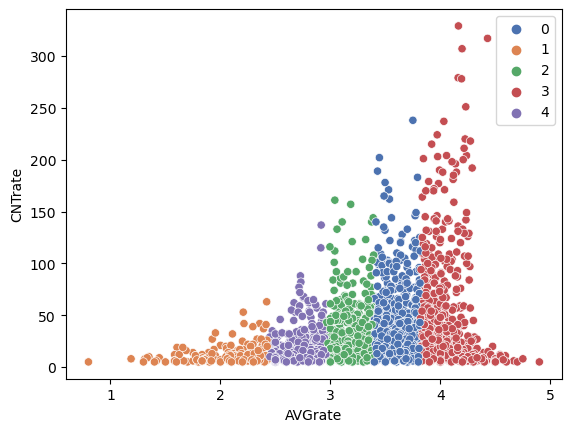

In [91]:
seaborn.scatterplot(data=mydataFinal3, x="AVGrate",y=tempCNT, hue=machine.labels_, legend="full", palette="deep")

DBSCAN-3

<AxesSubplot: xlabel='AVGrate', ylabel='CNTrate'>

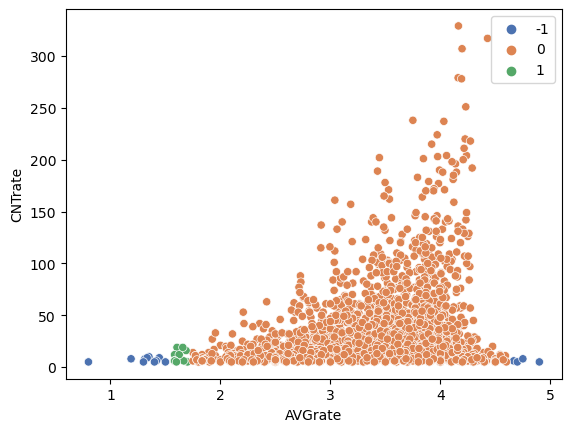

In [92]:
machineDB = DBSCAN(eps=0.05, min_samples=5).fit(mydataFinal3)
seaborn.scatterplot(data=mydataFinal3, x="AVGrate",y=tempCNT, hue=machineDB.labels_, legend="full", palette="deep")